### Observed Properties of Astronomical Systems 
#### Homework 2 
By Elvira Cruz-Cruz

#### 1. Signal-to-Noise: An interesting object has been discovered with rAB = 22 mag and you would like to observe it further. Note that the SDSS r-band has $\lambda_c = 0.626 \mu m$, $d\lambda = 0.1064 \mu m$, and the zeropoint of the AB magnitude system is 3631 Jy. 

#### a. What is the flux zeropoint per unit wavelength $f_{\lambda}$? PLease use $erg  s^{-1} cm^{-2} A^{-1}$

In [1]:
f_mu = 3631*1.e-23 #Jansky converted to erg s^-1 cm^-2 Hz^-1
c = 2.998e10 # in cm/s
lambdaa_c = 0.626*1.e-4 #micrometer converted to cm
f_lambda = (f_mu*c)/lambdaa_c**2
f_lambda_ang = f_lambda*1.e-8 #converted one of the cm to angstroms 
print(f_lambda_ang , 'erg s^-1 cm^-2 A^-1')

2.7778526880952136e-09 erg s^-1 cm^-2 A^-1


#### b. What is the zeropoint in photons $s^{-1} cm^{-2} A^{-1}$ ?


In [2]:
# 1 erg = cm^2 g s^-2
h = 6.62607004e-34*1.e4*1.e3 #m^2 kg/s to cm^2 g/s
energy_photon = (h*c)/lambdaa_c #cm^2 g s^-2 
print('energy of a photon',energy_photon)

flux_photons = f_lambda_ang/energy_photon
print(flux_photons, 's^-1 cm^-2 A^-1')

energy of a photon 3.1733159712332272e-12
875.3785356633342 s^-1 cm^-2 A^-1


#### c. How many r-band photons are incident on one of the LBT's 8.4m diameter primary mirrors per second? Ignore atmospheric absorption.


In [3]:
import numpy as np 

m_AB = 22 #mag

flux_mu = 10**((m_AB + 48.60)/(-2.5)) #erg s^-1 cm^-2 Hz^-1
c = 2.998e10 # in cm/s
lambdaa_c = 0.626*1.e-4 #micrometer converted to cm
f_lambda2 = (flux_mu*c)/lambdaa_c**2
f_lambda_ang2 = f_lambda2*1.e-8 #converted one of the cm to angstroms 
print(f_lambda_ang2 , 'erg s^-1 cm^-2 A^-1')


dlambdaa_c = 0.1064*1.e-4 #micrometer converted to cm



h = 6.62607004e-34*1.e4*1.e3 #m^2 kg/s to cm^2 g/s
energy_photon = (h*c)/dlambdaa_c #cm^2 g s^-2 
print('energy of a photon=',energy_photon)
print()
flux_mu2 = f_lambda_ang2/energy_photon
print(flux_mu2, 's^-1 cm^-2 A^-1')
print()

area_lbt = np.pi*(((8.4*100)/2)**2) #cm^2
dlambdaa_A = lambdaa_c*1.e8 #cm converted to Angstrom 
rband_photons = flux_mu2*area_lbt*dlambdaa_A
print('r-band photons per sec ', rband_photons )

4.4023337283651016e-18 erg s^-1 cm^-2 A^-1
energy of a photon= 1.86700732893985e-11

2.3579627461156757e-07 s^-1 cm^-2 A^-1

r-band photons per sec  818.0120966689833


#### d. Read through the online MODS1 Instrumental Sensitivity document. Use those data to calculate the ADU/s expected from this object in imaging mode. Assume airmass X=1.



In [4]:
m_ABr0 = 27.24
K_r = 0.10
X = 1

adu_s = 10**((m_AB - m_ABr0 + (K_r*X))/(-2.5))

print(adu_s,' ADU/s')

113.76272858234299  ADU/s


#### e. Use your results from (c) and (d) to estimate the total system throughput (atmosphere + telescope + instrument). Identify and provide a quantitative discussion of the main contributors to the throughput. A short paragraph should suffice.


In [5]:
throughput = rband_photons/adu_s #The number of photons that are actually read by the detector
print(throughput)
throughput_percent = (1/throughput)
print(throughput_percent*100,'%')

7.19051052012079
13.907218370681163 %


Throughput is the total amount of photons that are actually read by the detector. In this case about 13.9% of the photons that go through the telescope actually reach the detector. Influences to this percentage are atmospheric conditions, such as sky brackground noise, the readout noise of the instrument and the size of the telescope, including its seeing ability, or radius aperature.

#### f. How long do you need to integrate to achieve about S/N = 10 per pixel? Ignore sky brightness. 


In [6]:
SNR_3 = 10 #per pixel
N_r = 2.5 # e-
A_tel = np.pi*(((8.4*100)/2)**2)
eta =throughput

s_sqrt = SNR_3**4 +(4*N_r**2*SNR_3**2)
S = ((-SNR_3**2) + s_sqrt)/2 
t_int = S/(flux_mu2*A_tel*dlambdaa_A*eta)
print(t_int,'sec')
print(S)


1.0540767581474397 sec
6200.0


##### g. It is near full moon so the sky brightness is rAB = 21 mag per arcsec^2. The seeing is 1”, so you have chosen a 1.5” radius aperture. What is the S/N in 10s? 


In [7]:
m_ABr0 = 27.24
K_r = 0.10
X = 1
m_rAB = 21
adu_s5 = 10**((m_rAB - m_ABr0 + (K_r*X))/(-2.5))

#print(adu_s5,' ADU/s')

flux_mu5 = 10**((m_rAB + 48.60)/(-2.5)) #erg s^-1 cm^-2 Hz^-1
c = 2.998e10 # in cm/s
lambdaa_c5 = 0.626*1.e-4 #micrometer converted to cm
f_lambda5 = (flux_mu5*c)/lambdaa_c5**2
f_lambda_ang5 = f_lambda5*1.e-8 #converted one of the cm to angstroms 
#print(f_lambda_ang5 , 'erg s^-1 cm^-2 A^-1')


dlambdaa_c5 = 0.1064*1.e-4 #micrometer converted to cm



h = 6.62607004e-34*1.e4*1.e3 #m^2 kg/s to cm^2 g/s
energy_photon5 = (h*c)/dlambdaa_c5 #cm^2 g s^-2 
#print('energy of a photon=',energy_photon5)
#print()
flux_mu5 = f_lambda_ang5/energy_photon5
#print(flux_mu5, 's^-1 cm^-2 A^-1')
#print()

area_lbt5 = np.pi*(((8.4*100)/2)**2) #cm^2
dlambdaa_A5 = lambdaa_c5*1.e8 #cm converted to Angstrom 
rband_photons5 = flux_mu5*area_lbt5*dlambdaa_A5
#print('r-band photons per sec ', rband_photons5 )

throughput5 = rband_photons5/adu_s5 #The number of photons that are actually read by the detector
#print(throughput5)
throughput_percent5 = (1/throughput5)
#print(throughput_percent5*100,'%')


In [8]:
m_rAB = 21 #mag per arcsec^2

flux_mu3 = 10**((m_rAB + 48.60)/(-2.5)) #erg s^-1 cm^-2 Hz^-1
c = 2.998e10 # in cm/s
lambdaa_c = 0.626*1.e-4 #micrometer converted to cm
f_lambda3 = (flux_mu3*c)/lambdaa_c**2
f_lambda_ang3 = f_lambda3*1.e-8 #converted one of the cm to angstroms 
#print(f_lambda_ang3 , 'erg s^-1 cm^-2 A^-1')


dlambdaa_c3 = 0.1064*1.e-4*1.e8 #micrometer converted to Angstrom



h = 6.62607004e-34*1.e4*1.e3 #m^2 kg/s to cm^2 g/s
energy_photon3 = (h*c)/lambdaa_c #cm^2 g s^-2 
#print('energy of a photon=',energy_photon3)
#print()
flux_mu4 = f_lambda_ang3/energy_photon3
#print('flux of sky background',flux_mu4, 's^-1 cm^-2 A^-1 arcsec^-2')
#print()

flux_star_lambda = flux_mu2
t_int2 = 10 #sec
A_tel2 = np.pi*(((8.4*100)/2)**2) # area in cm^2
delta_lambda2 = dlambdaa_c3
eta2 = throughput5
flux_sky_lambda = flux_mu4
delta_omega = np.pi*(1.5**2) # arcsec^2

SNR_4 = flux_star_lambda*((np.sqrt(t_int2*A_tel2*delta_lambda2*eta2))/(np.sqrt(flux_sky_lambda*delta_omega)))
print('Signal-to-Noise=',SNR_4, 'per pixel')


Signal-to-Noise= 9.782747075514013 per pixel


##### h. Under these sky conditions, how long do you need to integrate to achieve the same S/N ratio you originally estimated in part (f)?


In [9]:
flux_sky_lambda = flux_mu4
flux_star_lambda = flux_mu2
delta_lambda3 = delta_lambda2
eta3 = throughput_percent

t_int3 = (SNR_4*flux_sky_lambda*delta_omega)/((flux_star_lambda**2)*A_tel2*delta_lambda3*eta3)
print('integration time', t_int3, 'seconds')

integration time 52.85165929453548 seconds


##### i. A week later you are able to obtain a spectrum with the dual grating mode under dark conditions (rAB = 22 mag per arcsec2). How long do you need to integrate to get S/N = 5 per pixel in your spectrum? Use the 1” slit and assume no slit losses. Round your exposure time to the nearest minute.


In [10]:
m_rAB8 = 22 #mag per arcsec^2

flux_mu8 = 10**((m_rAB8 + 48.60)/(-2.5)) #erg s^-1 cm^-2 Hz^-1
c = 2.998e10 # in cm/s
lambdaa_c8 = 0.626*1.e-4 #micrometer converted to cm
f_lambda8 = (flux_mu8*c)/lambdaa_c8**2
f_lambda_ang8 = f_lambda8*1.e-8 

In [11]:
m_rAB7 = 22 #mag per arcsec^2
lambdaa_dual = 6500 #angstroms
flux_mu7_sky = 10**((-0.9608)-(0.4*m_rAB7)-(2*np.log(lambdaa_dual)))
print(flux_mu7_sky)



4.787238761032607e-28


In [12]:
g= 2.5
SNR_7 = 5
sigma_ro7 = 2.5
S_lambda = (-(SNR_7**2*g) + np.sqrt((SNR_7**4)*(g**2) - (4*g**2)*((-SNR_7**2)*(sigma_ro7**2))))/(2*g**2)
X=1
F_lambda = f_lambda_ang8
S_lambda0 = 16.487
K_lambda = 0.085

t_exp7 = 10**(np.log(S_lambda)-np.log(S_lambda0)-np.log(F_lambda)+0.4*K_lambda*X)

print(t_exp7)

8.392454871403379e+37


### 2. Data exploration with sciserver.org and SDSS. Use sciserver.org and a jupyter notebook to identify the following data and produce the following figures. You are encouraged to use published catalogs to help focus your search, just be sure to cite any references you use. 

#### a. Identify an open or globular cluster in the SDSS footprint and plot an r vs. g-r colormagnitude diagram for the cluster. Make sure you choose a cluster with an obvious main sequence and giant branch. 

In [13]:
%matplotlib inline

from __future__ import division

import numpy as np
import pandas as pd
from astropy import coordinates as coords
from astroquery.sdss import SDSS
%matplotlib inline
import matplotlib.pyplot as plt


In [14]:
#NGC 7078
query = 'SELECT TOP 500                     \
            p.ra, p.dec, p.g, (p.g - p.r) as gmr, p.r, pmra, pmdec, pmraerr, pmdecerr, pml, pmb       \
        FROM star s             \
            JOIN propermotions pm ON s.objid = pm.objid            \
            JOIN PhotoObj p ON p.objid = pm.objid                  \
        WHERE                     \
            s.ra between 322.4958-0.04 and 322.4958+0.04           \
            AND s.dec between 12.1669-0.15 and 12.1669+0.15'        

In [15]:
ngc_7078 = SDSS.query_sql(query, data_release=16, cache=True)

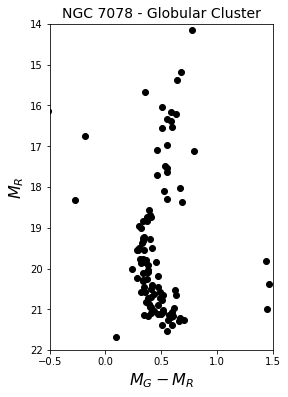

In [16]:
mag_r = np.array(ngc_7078['r'])
mag_gr = np.array(ngc_7078['gmr'])

SMALL_SIZE = 14
BIGGER_SIZE = 16
plt.figure(figsize=(4,6))
plt.rc('axes', titlesize=SMALL_SIZE) 
plt.rc('axes', labelsize=BIGGER_SIZE)
plt.title('NGC 7078 - Globular Cluster')
plt.ylim(22,14)
plt.xlim(-0.5,1.5)
plt.xlabel('$M_{G}-M_{R}$')
plt.ylabel('$M_{R}$')
plt.scatter(mag_gr,mag_r,color='black')
plt.show()

#### b. Identify an RR Lyrae star in the Stripe 82 region and plot a phased, g-band light curve based on SDSS photometry. I encourage you to identify and use a catalog of known RR Lyrae stars to choose one with a known period, although there is an implementation of the Lomb-Scargle algorithm within astropy.stats (and another in scipy). 

#### I went a bit over the 10 hour mark for this assignment. I spent a lot of time on part 1, that I wasn't able to finish this part b. I'm sorry, for not being able to fully complete part 2b. 

In [18]:
from astroML.datasets import fetch_sdss_spectrum
from astroML.datasets import fetch_sdss_S82standards

In [50]:
data = fetch_sdss_S82standards()  
gmag = data['mmed_g']
#print(data)

In [ ]:
from astropy.timeseries import LombScargle
import scipy.signal as signal

A = 2
w = 1.
phi = 0.5 * np.pi
x = np.linspace(0.01, 10*np.pi, len(gmag))
y = A * np.sin(w*gmag+phi)
f = np.linspace(0.01, 10, len(gmag))

pgram = signal.lombscargle(x, gmag, f, normalize=True)
plt.plot(x, gmag, 'b+')
plt.plot(f, pgram)
plt.show()

#### c. Identify a cataclysmic variable star with an SDSS spectrum. Plot the spectrum and label several of the most prominent emission lines. 

#### V 405 (Cataclysmic Variable Star) In Pegasus Constellation 
I got the MJD-Plate-Fiber values for a cataclysmic variable star obtained with SDSS from this article:
https://iopscience.iop.org/article/10.1088/0004-6256/142/6/181
I also found the name of this Cataclysmic Variable star by inputing the RA and DEC into the SIMDAD Data base. The results to the basic query I ran on SIMDAD is as follows: http://simbad.u-strasbg.fr/simbad/sim-id?Ident=%401472196&Name=V*%20V405%20Peg&submit=submit

In [19]:
# 23 09 49.12 +21 35 16.7
mjd = 54328
plate = 2623
fiber = 193

spec = fetch_sdss_spectrum(plate, mjd, fiber)

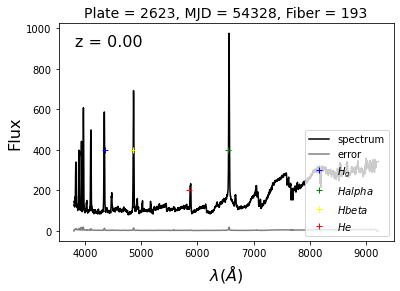

In [47]:
ax = plt.axes()
ax.plot(spec.wavelength(), spec.spectrum, '-k', label='spectrum')
ax.plot(spec.wavelength(), spec.error, '-', color='gray', label='error')
ax.plot(4350, 400, 'b+', color='blue', label='$H_{g}$')
ax.plot(6550, 400, 'b+', color='green', label='$H alpha$')
ax.plot(4850, 400, 'b+', color='yellow', label='$H beta$')
ax.plot(5850, 200, 'b+', color='red', label='$He$')
ax.legend(loc=4)

ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())

ax.text(0.05, 0.95, 'z = %.2f' % spec.z, size=16,
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('Flux')

plt.show()
